In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("heart_failure_clinical_records_dataset.csv")
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [5]:
df.shape

(299, 13)

<AxesSubplot:>

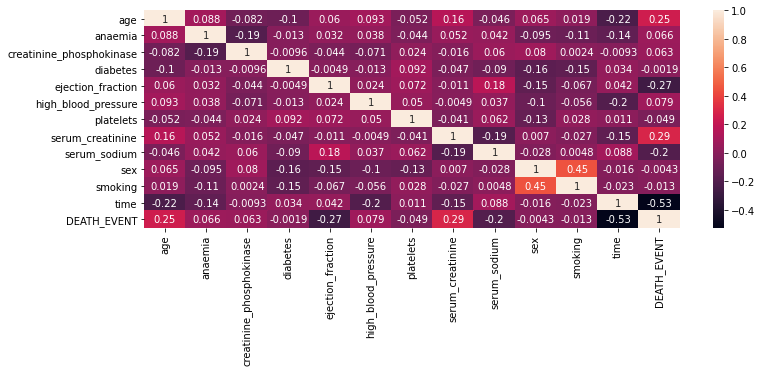

In [6]:
plt.figure(figsize=(12,4))
sns.heatmap(df.corr(),annot = True)

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='age'>

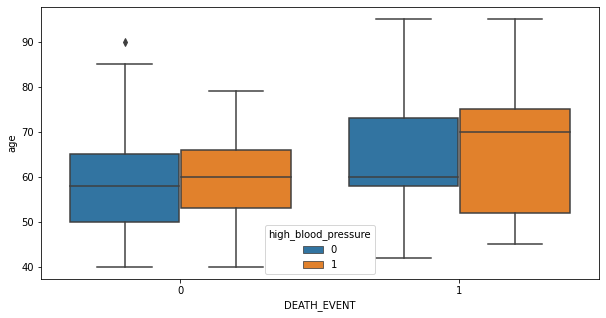

In [9]:
plt.figure(figsize=(10,5))
sns.boxplot(x = df['DEATH_EVENT'], y = df['age'],hue = df['high_blood_pressure'])

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='age'>

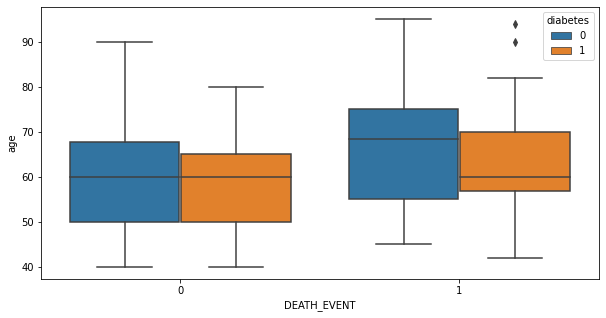

In [10]:
plt.figure(figsize=(10,5))
sns.boxplot(x = df['DEATH_EVENT'], y = df['age'],hue = df['diabetes'])

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='count'>

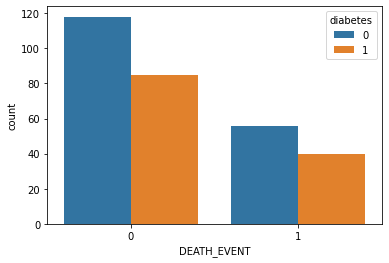

In [11]:
sns.countplot(df['DEATH_EVENT'],hue = df['diabetes'])

<AxesSubplot:xlabel='diabetes'>

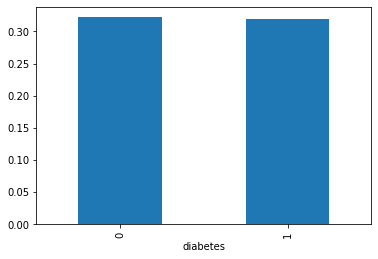

In [12]:
df.groupby('diabetes').mean()['DEATH_EVENT'].plot(kind = 'bar')

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='time'>

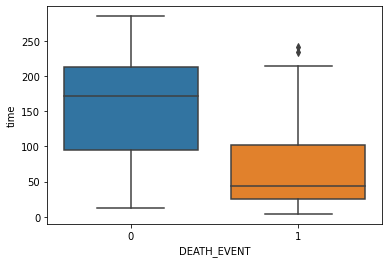

In [13]:
sns.boxplot(x = df['DEATH_EVENT'],y = df['time'])

In [14]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report

In [15]:
X = df.drop('DEATH_EVENT',axis = 1)
y = df['DEATH_EVENT']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [18]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [20]:
X_test.shape

(30, 12)

In [21]:
from sklearn.svm import SVC

In [22]:
model = SVC()

In [23]:
model.fit(X_train,y_train)

SVC()

In [24]:
predicitions = model.predict(X_test)

In [26]:
print(confusion_matrix(y_test,predicitions),classification_report(y_test,predicitions),sep = "\n")

[[18  0]
 [ 6  6]]
              precision    recall  f1-score   support

           0       0.75      1.00      0.86        18
           1       1.00      0.50      0.67        12

    accuracy                           0.80        30
   macro avg       0.88      0.75      0.76        30
weighted avg       0.85      0.80      0.78        30



In [27]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [29]:
import numpy as np

In [91]:
my_data = np.array([[75.0,0,7861,1,20,1,265000.00,1.9,130,1,1,4]])

In [92]:
my_data = scaler.transform(my_data)

In [96]:
my_prediction = model.predict(my_data)

In [97]:
import pyttsx3 #pip install pyttsx3

In [98]:
def text_to_speech(text):
    engine = pyttsx3.init()
    engine.setProperty('rate',110)
    engine.say(text)
    engine.runAndWait()

In [105]:
def result(prediction):
    if prediction[0] == 0:
        text = 'You are Safe !'
        text_to_speech(text)
        print(text)

    else:
        text = 'You will die soon !'
        text_to_speech(text)
        print(text)

In [107]:
result(my_prediction)

You will die soon !
